In [2]:
import pandas as pd

# txt file upload
url = 'https://raw.githubusercontent.com/Soohwan-Lee/hcmld21/main/Datasets/CUB_200_2011/image_attribute_labels.txt'
imgatt = pd.read_csv(url,sep='\s+', header=None, error_bad_lines=False, warn_bad_lines=False, usecols=[0,1,2],
                     names=['imgid','attid','present'])

In [3]:
imgatt.head()

imgid  attid  present
0      1      1        0
1      1      2        0
2      1      3        0
3      1      4        0
4      1      5        1

In [4]:
imgatt.shape

(3677856, 3)

In [5]:
imgatt2 = imgatt.pivot(index='imgid', columns='attid',values='present')

In [6]:
imgatt2.head()

attid  1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
1        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
5        0    0    0    0    1    0    0    0    0    0  ...    0    0    1   

attid  306  307  308  309  310  311  312  
imgid                                     
1        0    0    1    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    1    0    0    1    0  
4        1    0    0    1    0    0    0  
5        0    0    0    0    0    0    0  

[5 rows x 312 columns]

In [7]:
imgatt2.shape

(11788, 312)

In [8]:
secondUrl = 'https://raw.githubusercontent.com/Soohwan-Lee/hcmld21/main/Datasets/CUB_200_2011/image_class_labels.txt'
imglabels = pd.read_csv(secondUrl, sep=' ', header=None,names=['imgid','label'])
imglabels = imglabels.set_index('imgid')

In [9]:
imglabels.head()

label
imgid       
1          1
2          1
3          1
4          1
5          1

In [10]:
imglabels.shape

(11788, 1)

In [11]:
df = imgatt2.join(imglabels)
df = df.sample(frac=1)

In [12]:
df_att = df.iloc[:, :312]
df_label = df.iloc[:, 312:]

In [13]:
df_att.head()

1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
9939     0    0    0    0    0    0    0    1    0    0  ...    0    0    0   
3559     0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
10282    0    0    0    0    0    0    0    1    0    0  ...    0    0    0   
6791     0    0    0    0    0    0    0    1    0    0  ...    0    1    0   
4974     0    1    0    0    0    0    0    0    0    0  ...    0    0    0   

       306  307  308  309  310  311  312  
imgid                                     
9939     0    0    0    0    0    0    0  
3559     1    0    0    0    0    0    1  
10282    0    0    0    0    0    1    0  
6791     0    0    0    0    0    1    0  
4974     0    0    0    0    0    0    0  

[5 rows x 312 columns]

In [14]:
df_train_att = df_att[:8000]
df_train_label = df_label[:8000]
df_test_att = df_att[8000:]
df_test_label = df_label[8000:]

df_train_label = df_train_label['label']
df_test_label = df_test_label['label']

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=50, random_state = 0, n_estimators=100)

In [16]:
clf.fit(df_train_att, df_train_label)

RandomForestClassifier(max_features=50, random_state=0)

In [17]:
print(clf.predict(df_train_att.head()))

[169  62 175 116  86]


In [18]:
clf.score(df_test_att,df_test_label)

0.442713833157339

In [19]:
from sklearn.metrics import confusion_matrix
pred_labels = clf.predict(df_test_att)
cm = confusion_matrix(df_test_label, pred_labels)

In [20]:
cm

array([[ 3,  3,  3, ...,  0,  0,  0],
       [ 0,  8,  0, ...,  0,  0,  0],
       [ 2,  0,  9, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  4,  1,  0],
       [ 0,  0,  0, ...,  0,  9,  0],
       [ 0,  0,  0, ...,  0,  0, 15]], dtype=int64)

In [73]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #    plt.text(j, i, format(cm[i, j], fmt),
    #             horizontalalignment="center",
    #             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [66]:
thirdUrl = 'https://raw.githubusercontent.com/Soohwan-Lee/hcmld21/main/Datasets/CUB_200_2011/classes.txt'
birds = pd.read_csv(thirdUrl, sep='\s+', header = None, usecols=[1], names = ['birdname'])
birds = birds['birdname']
birds

0      001.Black_footed_Albatross
1            002.Laysan_Albatross
2             003.Sooty_Albatross
3           004.Groove_billed_Ani
4              005.Crested_Auklet
                  ...            
195                196.House_Wren
196                197.Marsh_Wren
197                 198.Rock_Wren
198               199.Winter_Wren
199       200.Common_Yellowthroat
Name: birdname, Length: 200, dtype: object

In [23]:
import numpy as np
np.set_printoptions(precision=2)
plt.figure(figsize=(60,60), dpi=300)
plot_confusion_matrix(cm, classes=birds, normalize=True)
plt.show()

Normalized confusion matrix
[[0.19 0.19 0.19 ... 0.   0.   0.  ]
 [0.   0.89 0.   ... 0.   0.   0.  ]
 [0.07 0.   0.33 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.04 ... 0.15 0.04 0.  ]
 [0.   0.   0.   ... 0.   0.41 0.  ]
 [0.   0.   0.   ... 0.   0.   0.79]]


In [24]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
clftree.fit(df_train_att,df_train_label)
clftree.score(df_test_att, df_test_label)

0.2642555438225977

In [25]:
from sklearn import svm
clfsvm = svm.SVC()
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.4659450897571278

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.45 (+/- 0.01)


In [27]:
scorestree = cross_val_score(clftree, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scorestree.mean(), scorestree.std()*2))

Accuracy: 0.26 (+/- 0.01)


In [28]:
scoressvm = cross_val_score(clfsvm, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoressvm.mean(), scoressvm.std()*2))

Accuracy: 0.47 (+/- 0.02)


In [29]:
max_features_opts = range(5,50,5)
n_estimators_opts = range(10,200,20)
rf_params = np.empty((len(max_features_opts)*len(n_estimators_opts),4),float)
i=0
for max_features in max_features_opts:
    for n_estimators in n_estimators_opts:
        clf = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators)
        scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
        rf_params[i,0] = max_features
        rf_params[i,1] = n_estimators
        rf_params[i,2] = scores.mean()
        rf_params[i,3] =scores.std() * 2
        i += 1
        print("Max Features: %d, numestimators: %d, accuracy: %0.2f (+/- %0.2f)" % \
             (max_features, n_estimators, scores.mean(), scores.std() * 2))

Max Features: 5, numestimators: 10, accuracy: 0.27 (+/- 0.02)
Max Features: 5, numestimators: 30, accuracy: 0.37 (+/- 0.02)
Max Features: 5, numestimators: 50, accuracy: 0.39 (+/- 0.01)
Max Features: 5, numestimators: 70, accuracy: 0.41 (+/- 0.01)
Max Features: 5, numestimators: 90, accuracy: 0.42 (+/- 0.02)
Max Features: 5, numestimators: 110, accuracy: 0.43 (+/- 0.01)
Max Features: 5, numestimators: 130, accuracy: 0.44 (+/- 0.01)
Max Features: 5, numestimators: 150, accuracy: 0.44 (+/- 0.00)
Max Features: 5, numestimators: 170, accuracy: 0.45 (+/- 0.02)
Max Features: 5, numestimators: 190, accuracy: 0.45 (+/- 0.01)
Max Features: 10, numestimators: 10, accuracy: 0.29 (+/- 0.02)
Max Features: 10, numestimators: 30, accuracy: 0.38 (+/- 0.02)
Max Features: 10, numestimators: 50, accuracy: 0.41 (+/- 0.01)
Max Features: 10, numestimators: 70, accuracy: 0.43 (+/- 0.02)
Max Features: 10, numestimators: 90, accuracy: 0.43 (+/- 0.01)
Max Features: 10, numestimators: 110, accuracy: 0.44 (+/- 0.

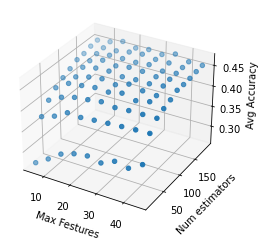

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
fig.clf()
ax = fig.gca(projection='3d')
x = rf_params[:,0]
y = rf_params[:,1]
z = rf_params[:,2]
ax.scatter(x,y,z)
ax.set_xlabel('Max Festures')
ax.set_ylabel('Num estimators')
ax.set_zlabel('Avg Accuracy')
plt.show()

# 3.2 Meaning of CV
CV means 'k' in k-fold cross-validation. For example, if k = 5, then divide data set into 5 chunks, and using one chunk for test set, and 4 chunk for training set. Thus, It use 80% of data set for training set, and 20% of data set for test set, if 'CV=5'. Also, it make models as much as number of CV in cross-validation. So, if CV = 5, then it make 5 models. Thus, if value of CV is higher, than accuracy will be increased, however, whole processing cost will be higher.

# 3.3 Different Kernel
## linear, poly, rbf, sigmoid, precomputed
In Support Vectore Machine, choosing the type of kernel is sensitive problem. As shown in below code, accuracy values are different depend on each kernel. For this data set, rbf(Gaussian radial basis function) kernel which is useful for non-linear hyperplane has the highest accuracy.

In [61]:
### 3.3 Different Kernel
from sklearn import svm

# rbf
clfsvm = svm.SVC()
clfsvm.fit(df_train_att, df_train_label)
score = clfsvm.score(df_test_att, df_test_label)
print('Accuracy of rbf: %0.3f' % (score))

# linear
clfsvm = svm.SVC(kernel = 'linear')
clfsvm.fit(df_train_att, df_train_label)
score = clfsvm.score(df_test_att, df_test_label)
print('Accuracy of linear: %0.3f' % (score))

# poly
clfsvm = svm.SVC(kernel = 'poly')
clfsvm.fit(df_train_att, df_train_label)
score = clfsvm.score(df_test_att, df_test_label)
print('Accuracy of poly: %0.3f' % (score))


# sigmoid
clfsvm = svm.SVC(kernel = 'sigmoid')
clfsvm.fit(df_train_att, df_train_label)
score = clfsvm.score(df_test_att, df_test_label)
print('Accuracy of sigmoid: %0.3f' % (score))

# precomputed
# REF:https://gist.github.com/amueller/1351047
clfsvm = svm.SVC(kernel = 'precomputed')
kernel_train_att = np.dot(df_train_att, df_train_att.T)
clfsvm.fit(kernel_train_att, df_train_label)
kernel_test_att = np.dot(df_test_att,df_train_att.T)
score = clfsvm.score(kernel_test_att, df_test_label)
print('Accuracy of precomputed: %0.3f' % (score))

Accuracy of rbf: 0.466
Accuracy of linear: 0.441
Accuracy of poly: 0.426
Accuracy of sigmoid: 0.450
Accuracy of precomputed: 0.441


# 3.4 Improve the accuracy of SVM
I demonstrated for using rbf kernel case which has the highest accuracy for this data set.
Default value was 'Kernel: rbf', 'C: float, 1.0', and 'gamma: 'float, scale(1/(n_features * X.var()))' I changed C value and gamma value from scale to auto
REF: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [75]:
### 3.4 Improve the accuracy of SVM

# default case
clfsvm = svm.SVC()
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.4659450897571278

In [88]:
# better accuracy case
clfsvm = svm.SVC(C=15.0, gamma='auto')
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.4677930306230201

In [92]:
# better accuracy case
clfsvm = svm.SVC(C=15.0, gamma=0.05)
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.47333685322069696